<a href="https://colab.research.google.com/github/LoguPrasanth-hub/Customer-Behavior-Analysis-for-Fyntra-s-E-Commerce-Platform/blob/main/Customer_Behavior_Analysis_for_Fyntra's_E_Commerce_Platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Behavior Analysis for Fyntra's E-Commerce Platform**

In [ ]:
#Importing necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error

In [ ]:
#Importing the Dataset.
df=pd.read_csv("FyntraCustomerData.csv")
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
#Checking the null values in the Dataset.
df.isnull().sum()

,0
Email,0
Address,0
Avatar,0
Avg_Session_Length,0
Time_on_App,0
Time_on_Website,0
Length_of_Membership,0
Yearly_Amount_Spent,0


In [ ]:
#Checking the Dataset Information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


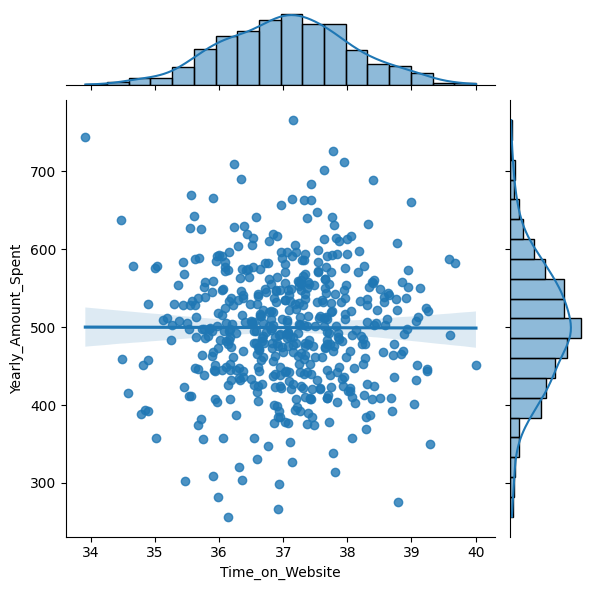

In [ ]:
sns.jointplot(x='Time_on_Website',y='Yearly_Amount_Spent',data=df,kind='reg')
plt.show()

*In the scatter plot, points are cluster around a straight line, there might be a correlation but it's weak*

In [ ]:
website_corr = df['Time_on_Website'].corr(df['Yearly_Amount_Spent'])
print(f"Correlation between Time on Website and Yearly Amount Spent: {website_corr}")

Correlation between Time on Website and Yearly Amount Spent: -0.002640844717963287


*The correlation is weak (closer to 0), spending time of website might not significatnly influence yearly spending.*

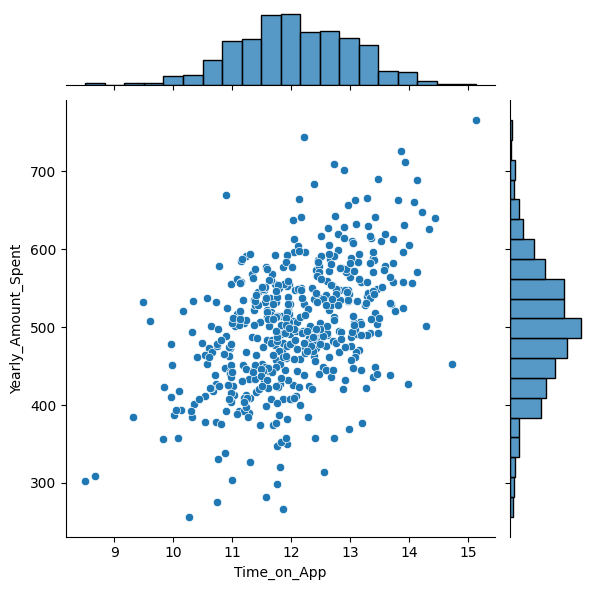

In [ ]:
sns.jointplot(x='Time_on_App',y='Yearly_Amount_Spent',data=df)
plt.show()

*The points are moving upward. There is a correlation but it's less positive.*

In [ ]:
app_corr = df['Time_on_App'].corr(df['Yearly_Amount_Spent'])
print(f"Correlation between Time on App and Yearly Amount Spent: {app_corr}")

Correlation between Time on App and Yearly Amount Spent: 0.4993277700598346


*The correlation is less positive (greater than 0, but not nearer to 1). Spending time on app significantly increasing yearly spending.*

*Compare to the time on website, time on app is better to impact on yearly spending.*

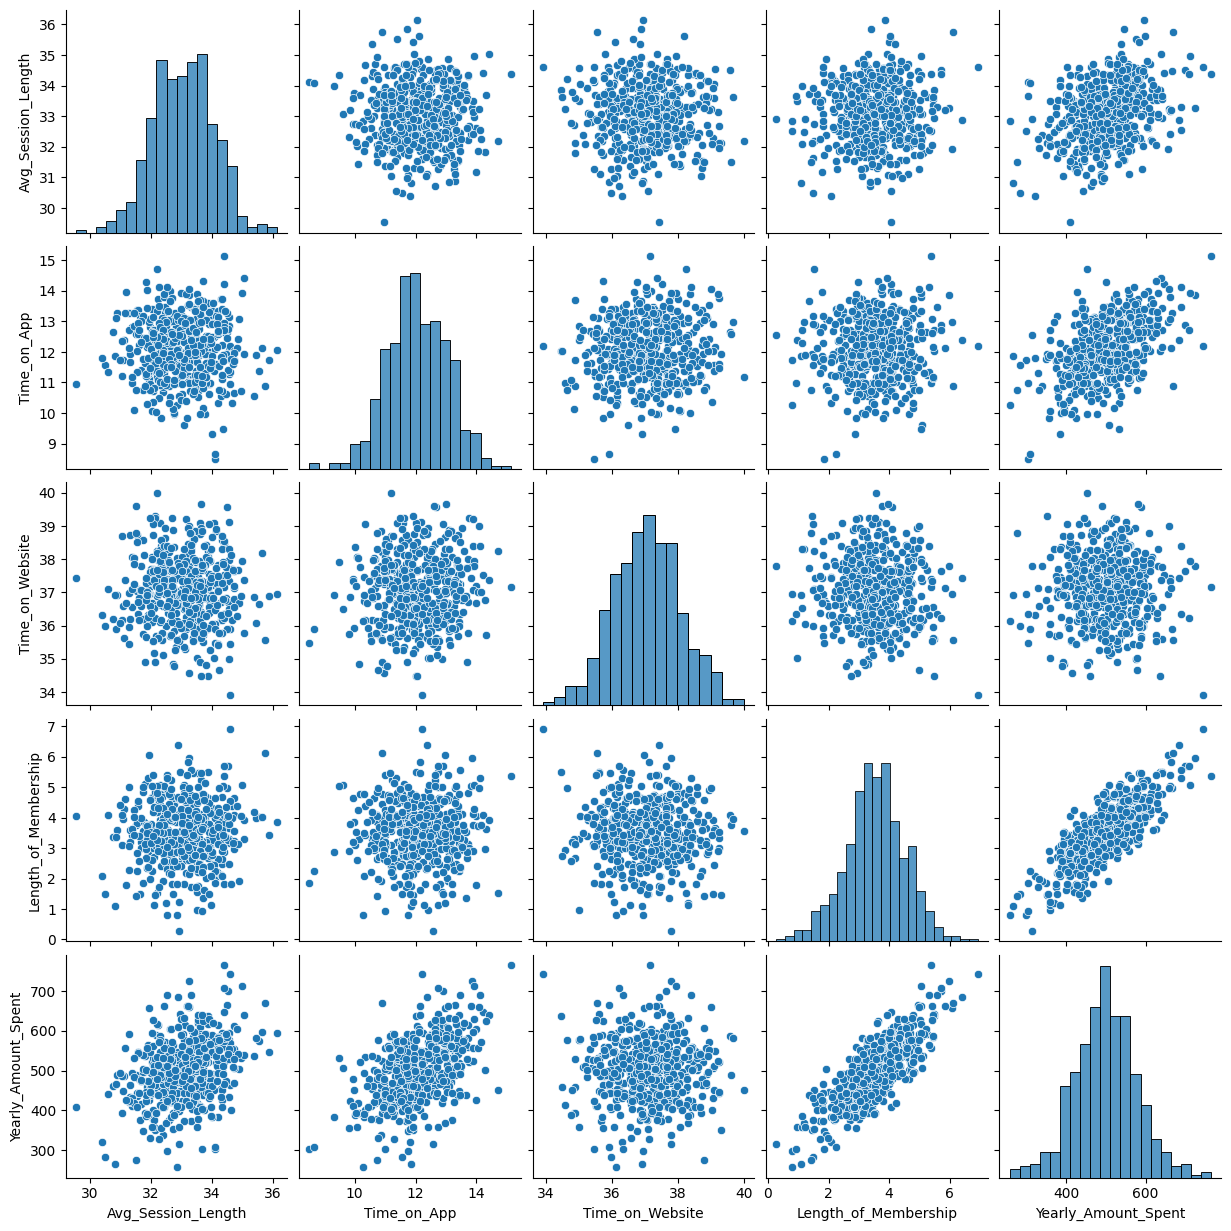

In [ ]:
sns.pairplot(df)

In [ ]:
correlation_matrix = df.drop(['Email','Address','Avatar'],axis=1).corr()
correlation_matrix['Yearly_Amount_Spent'].sort_values(ascending=False)

,Yearly_Amount_Spent
Yearly_Amount_Spent,1.000000
Length_of_Membership,0.809084
Time_on_App,0.499328
Avg_Session_Length,0.355088
Time_on_Website,-0.002641


*Length of Membership has the highest correlarion among others. It has positive correlation.*

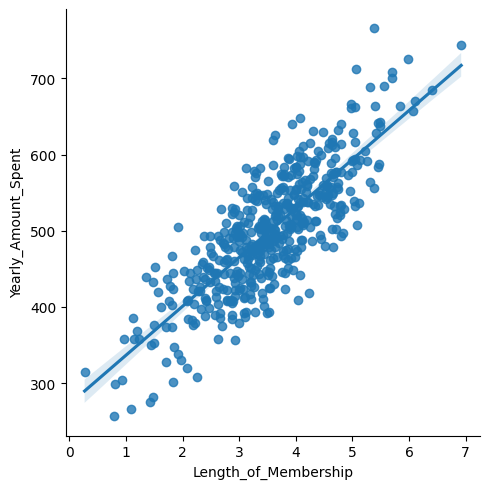

In [ ]:
sns.lmplot(x='Length_of_Membership',y='Yearly_Amount_Spent',data=df)
plt.show()

*The regression line fits well (points closely clustered around it), this suggests a strong relationship.*

In [ ]:
membership_corr = df['Length_of_Membership'].corr(df['Yearly_Amount_Spent'])
print(f"Correlation between Length of Membership and Yearly Amount Spent: {membership_corr}")

Correlation between Length of Membership and Yearly Amount Spent: 0.8090835682495691


*It suggests that longer memberships lead to higher yearly spending.*

In [ ]:
#Extracting features as x and vector as y.
x=df.drop(['Email','Address','Avatar','Yearly_Amount_Spent'],axis=1)
y=df['Yearly_Amount_Spent']

In [ ]:
#Spliting to Train and Test Data.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=85)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((350, 4), (150, 4), (350,), (150,))

In [ ]:
#Train the Model.
lr=LinearRegression()
lr.fit(x_train,y_train)

#Predicting the test data.
y_pred=lr.predict(x_test)

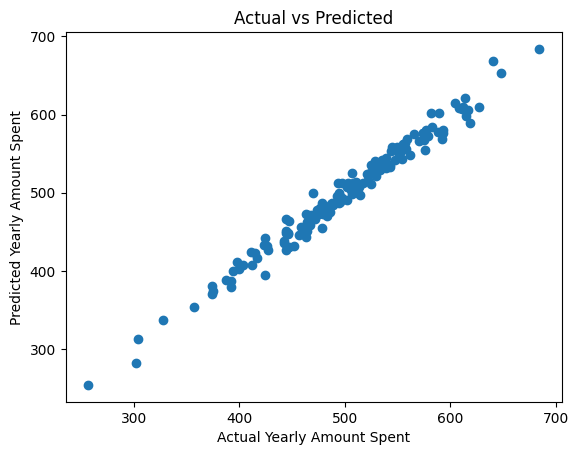

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs Predicted')
plt.show()

*Points are closely clustered around a diagonal line, the model performs well.*

In [ ]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

10.572658672879333

In [ ]:
coef=pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coef

,Coefficient
Avg_Session_Length,26.081632
Time_on_App,39.187788
Time_on_Website,0.404600
Length_of_Membership,61.417778


**CONCLUSION**

*The company must focus on improving app instead of website.*